In [1]:
from pathlib import Path
import pandas as pd
from tqdm.notebook import tqdm 
from datetime import  datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

In [2]:
# Set the directory
#Run this first for OPI cleaning
# OPI CLEANING AND AVERAGING
path = Path('U:') / 'Opi system file' / 'SQL database'/ 'New Data Processing'

In [3]:
# Original file name
filename = path / 'PHERC RAW BIN13.xls'

In [4]:
# Load file into Pandas data frame
df = pd.read_excel(filename)
df

,OPI_DATE,CABLE_MAX,CABLE_MIN,CABLE_AVG,CABLE_LEVEL,BIN_MAX,BIN_MIN,BIN_SPREAD,BIN_AVG,BIN_MC_MAX,...,RH1,RH2,RH3,RH4,RH5,MC1,MC2,MC3,MC4,MC5
0,2020-10-28 15:23:28.000000,68.20\t-100.00\t-100.00\t-100.00\t-100.00\r\n,60.40\t-100.00\t-100.00\t-100.00\t-100.00\r\n,65.30\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,68.199997,60.400002,7.8,65.300003,7.800000,...,41.70\t42.10\t43.40\t44.40\t45.20\t46.00\t47.7...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
1,2020-10-28 16:08:00.000000,60.30\t-99.90\t59.90\t59.90\t-99.90\r\n,56.00\t-99.90\t56.40\t56.60\t-99.90\r\n,58.64\t-99.90\t58.46\t58.50\t-99.90\r\n,NaN,60.299999,56.000000,4.3,58.540001,4.300000,...,52.10\t52.30\t52.80\t53.70\t54.40\t54.60\t55.7...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
2,2020-10-28 17:08:00.000000,54.60\t-99.90\t53.80\t53.70\t-99.90\r\n,52.10\t-99.90\t52.60\t52.50\t-99.90\r\n,53.58\t-99.90\t53.20\t53.10\t-99.90\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,54.599998,52.099998,2.5,53.299999,2.500000,...,62.80\t63.30\t63.40\t64.20\t65.30\t65.50\t66.2...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
3,2020-10-28 17:11:20.000000,54.20\t-99.90\t53.50\t53.30\t-99.90\r\n,51.80\t-99.90\t52.40\t52.30\t-99.90\r\n,53.27\t-99.90\t52.92\t52.81\t-99.90\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,54.200001,51.799999,2.4,53.009998,2.400000,...,63.50\t64.10\t64.20\t65.50\t66.00\t65.80\t66.5...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
4,2020-10-28 19:25:26.000000,45.80\t-100.00\t-100.00\t-100.00\t-100.00\r\n,44.30\t-100.00\t-100.00\t-100.00\t-100.00\r\n,45.18\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,45.799999,44.299999,1.5,45.180000,1.500000,...,88.50\t89.10\t89.00\t89.90\t90.30\t89.70\t89.4...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,2021-03-15 09:21:00.000000,48.00\t46.70\t50.20\t50.70\t51.20\r\n,34.90\t35.30\t35.40\t35.70\t35.70\r\n,39.68\t42.54\t42.89\t43.14\t44.24\r\n,NaN,50.700001,34.900

In [5]:
def clean_time(x):
    # Remove unnecesary charactor
    timestamp_text = x[:16]
    # Convert to Python datetime variable
    timestamp = datetime.strptime(timestamp_text, '%Y-%m-%d %H:%M')
    return timestamp

In [6]:
df['OPI_DATE'] = df['OPI_DATE'].apply(lambda x: clean_time(x))

In [7]:
df['C1'] = df['C1'].apply(lambda x: x.split('\t'))
df['C2'] = df['C2'].apply(lambda x: x.split('\t'))
df['C3'] = df['C3'].apply(lambda x: x.split('\t'))
df['C4'] = df['C4'].apply(lambda x: x.split('\t'))
df['C5'] = df['C5'].apply(lambda x: x.split('\t'))

In [8]:
df

,OPI_DATE,CABLE_MAX,CABLE_MIN,CABLE_AVG,CABLE_LEVEL,BIN_MAX,BIN_MIN,BIN_SPREAD,BIN_AVG,BIN_MC_MAX,...,RH1,RH2,RH3,RH4,RH5,MC1,MC2,MC3,MC4,MC5
0,2020-10-28 15:23:00,68.20\t-100.00\t-100.00\t-100.00\t-100.00\r\n,60.40\t-100.00\t-100.00\t-100.00\t-100.00\r\n,65.30\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,68.199997,60.400002,7.8,65.300003,7.800000,...,41.70\t42.10\t43.40\t44.40\t45.20\t46.00\t47.7...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
1,2020-10-28 16:08:00,60.30\t-99.90\t59.90\t59.90\t-99.90\r\n,56.00\t-99.90\t56.40\t56.60\t-99.90\r\n,58.64\t-99.90\t58.46\t58.50\t-99.90\r\n,NaN,60.299999,56.000000,4.3,58.540001,4.300000,...,52.10\t52.30\t52.80\t53.70\t54.40\t54.60\t55.7...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
2,2020-10-28 17:08:00,54.60\t-99.90\t53.80\t53.70\t-99.90\r\n,52.10\t-99.90\t52.60\t52.50\t-99.90\r\n,53.58\t-99.90\t53.20\t53.10\t-99.90\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,54.599998,52.099998,2.5,53.299999,2.500000,...,62.80\t63.30\t63.40\t64.20\t65.30\t65.50\t66.2...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
3,2020-10-28 17:11:00,54.20\t-99.90\t53.50\t53.30\t-99.90\r\n,51.80\t-99.90\t52.40\t52.30\t-99.90\r\n,53.27\t-99.90\t52.92\t52.81\t-99.90\r\n,-99.90\t-99.90\t-99.90\t-99.90\t-99.90\r\n,54.200001,51.799999,2.4,53.009998,2.400000,...,63.50\t64.10\t64.20\t65.50\t66.00\t65.80\t66.5...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
4,2020-10-28 19:25:00,45.80\t-100.00\t-100.00\t-100.00\t-100.00\r\n,44.30\t-100.00\t-100.00\t-100.00\t-100.00\r\n,45.18\t-100.00\t-100.00\t-100.00\t-100.00\r\n,NaN,45.799999,44.299999,1.5,45.180000,1.500000,...,88.50\t89.10\t89.00\t89.90\t90.30\t89.70\t89.4...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,NaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\tNaN\r\n,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...,-100.00\t-100.00\t-100.00\t-100.00\t-100.00\t-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,2021-03-15 09:21:00,48.00\t46.70\t50.20\t50.70\t51.20\r\n,34.90\t35.30\t35.40\t35.70\t35.70\r\n,39.68\t42.54\t42.89\t43.14\t44.24\r\n,NaN,50.700001,34.900002,15.8,45.139999,16.389999,...,71.10\t71

In [9]:
def average_first3(xs):
    total = 0
    count = 0
    for x in xs[:3]:
        if x != 'NaN' and float(x) > -32:
            total += float(x)
            count += 1
    if count > 0:
        return  total / count
    else:
        return np.nan

In [10]:
#USE THIS CODE FOR SENSOR 456 AVERAGE

#def average_first456(xs):
#     total = 0
#     count = 0
#     for x in xs[3:6]:
#         if x != 'NaN' and float(x) > -32:
#             total += float(x)
#             count += 1
#     if count > 0:
#         return  total / count
#     else:
#         return np.nan

In [11]:
clean_df = df[['OPI_DATE']].copy()
clean_df

,OPI_DATE
0,2020-10-28 15:23:00
1,2020-10-28 16:08:00
2,2020-10-28 17:08:00
3,2020-10-28 17:11:00
4,2020-10-28 19:25:00
...,...
2308,2021-03-15 09:21:00
2309,2021-03-15 10:21:00
2310,2021-03-15 11:21:00
2311,2021-03-15 12:21:00


In [12]:
clean_df['C1s-avg'] = df['C1'].apply(lambda x: average_first3(x)) 
clean_df['C2s-avg'] = df['C2'].apply(lambda x: average_first3(x)) 
clean_df['C3s-avg'] = df['C3'].apply(lambda x: average_first3(x)) 
clean_df['C4s-avg'] = df['C4'].apply(lambda x: average_first3(x)) 
clean_df['C5s-avg'] = df['C5'].apply(lambda x: average_first3(x)) 

In [13]:
df['RH1'] = df['RH1'].apply(lambda x: x.split('\t'))
df['RH2'] = df['RH2'].apply(lambda x: x.split('\t'))
df['RH3'] = df['RH3'].apply(lambda x: x.split('\t'))
df['RH4'] = df['RH4'].apply(lambda x: x.split('\t'))
df['RH5'] = df['RH5'].apply(lambda x: x.split('\t'))

In [14]:
clean_df['RH1s-avg'] = df['RH1'].apply(lambda x: average_first3(x)) 
clean_df['RH2s-avg'] = df['RH2'].apply(lambda x: average_first3(x)) 
clean_df['RH3s-avg'] = df['RH3'].apply(lambda x: average_first3(x)) 
clean_df['RH4s-avg'] = df['RH4'].apply(lambda x: average_first3(x)) 
clean_df['RH5s-avg'] = df['RH5'].apply(lambda x: average_first3(x)) 

In [15]:
df['MC1'] = df['MC1'].apply(lambda x: x.split('\t'))
df['MC2'] = df['MC2'].apply(lambda x: x.split('\t'))
df['MC3'] = df['MC3'].apply(lambda x: x.split('\t'))
df['MC4'] = df['MC4'].apply(lambda x: x.split('\t'))
df['MC5'] = df['MC5'].apply(lambda x: x.split('\t'))

In [16]:
clean_df['MC1s-avg'] = df['MC1'].apply(lambda x: average_first3(x)) 
clean_df['MC2s-avg'] = df['MC2'].apply(lambda x: average_first3(x)) 
clean_df['MC3s-avg'] = df['MC3'].apply(lambda x: average_first3(x)) 
clean_df['MC4s-avg'] = df['MC4'].apply(lambda x: average_first3(x)) 
clean_df['MC5s-avg'] = df['MC5'].apply(lambda x: average_first3(x)) 

In [17]:
clean_df_excel = clean_df.copy()
clean_df_excel['OPI_DATE'] = clean_df_excel['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
#save to excel
clean_df_excel.to_excel(path / 'OPI_Hourly_Avg_3sensors_Temp.xls', index=False)
clean_df

,OPI_DATE,C1s-avg,C2s-avg,C3s-avg,C4s-avg,C5s-avg,RH1s-avg,RH2s-avg,RH3s-avg,RH4s-avg,RH5s-avg,MC1s-avg,MC2s-avg,MC3s-avg,MC4s-avg,MC5s-avg
0,2020-10-28 15:23:00,67.800000,NaN,NaN,NaN,NaN,42.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-28 16:08:00,59.800000,NaN,59.533333,59.533333,NaN,52.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-28 17:08:00,54.100000,NaN,53.566667,53.500000,NaN,63.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-28 17:11:00,53.733333,NaN,53.266667,53.166667,NaN,63.933333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-28 19:25:00,45.233333,NaN,NaN,NaN,NaN,88.866667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,2021-03-15 09:21:00,35.933333,37.166667,35.533333,36.200000,38.000000,71.266667,NaN,NaN,NaN,NaN,15.160000,NaN,NaN,NaN,NaN
2309,2021-03-15 10:21:00,34.866667,36.333333,34.466667,35.000000,37.166667,74.133333,NaN,NaN,NaN,NaN,15.603333,NaN,NaN,NaN,NaN
2310,2021-03-15 11:21:00,34.233333,NaN,33.666667,34.533333,36.966667,77.666667,NaN,NaN,NaN,NaN,16.190000,NaN,NaN,NaN,NaN
2311,2021-03-15 12:21:00,34.433333,NaN,34.166667,34.466667,36.666667,77.200000,NaN,NaN,NaN,NaN,16.103333,NaN,NaN,NaN,NaN


In [18]:
clean_df = clean_df[clean_df['OPI_DATE'] > datetime(year=2020, month=11, day=3)]
clean_df

,OPI_DATE,C1s-avg,C2s-avg,C3s-avg,C4s-avg,C5s-avg,RH1s-avg,RH2s-avg,RH3s-avg,RH4s-avg,RH5s-avg,MC1s-avg,MC2s-avg,MC3s-avg,MC4s-avg,MC5s-avg
126,2020-11-03 00:51:00,38.066667,NaN,37.733333,37.833333,NaN,51.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,2020-11-03 01:51:00,38.166667,NaN,37.866667,37.933333,NaN,53.033333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,2020-11-03 02:51:00,37.933333,NaN,37.566667,37.600000,NaN,55.766667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,2020-11-03 03:51:00,37.300000,NaN,36.833333,36.866667,NaN,59.566667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,2020-11-03 04:51:00,35.866667,NaN,35.466667,35.400000,NaN,63.566667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,2021-03-15 09:21:00,35.933333,37.166667,35.533333,36.200000,38.000000,71.266667,NaN,NaN,NaN,NaN,15.160000,NaN,NaN,NaN,NaN
2309,2021-03-15 10:21:00,34.866667,36.333333,34.466667,35.000000,37.166667,74.133333,NaN,NaN,NaN,NaN,15.603333,NaN,NaN,NaN,NaN
2310,2021-03-15 11:21:00,34.233333,NaN,33.666667,34.533333,36.966667,77.666667,NaN,NaN,NaN,NaN,16.190000,NaN,NaN,NaN,NaN
2311,2021-03-15 12:21:00,34.433333,NaN,34.166667,34.466667,36.666667,77.200000,NaN,NaN,NaN,NaN,16.103333,NaN,NaN,NaN,NaN


In [19]:
#code for day time 7am to 7pm
clean_df = clean_df.loc[clean_df['OPI_DATE'].dt.hour.isin(range(7, 19))]
clean_df

,OPI_DATE,C1s-avg,C2s-avg,C3s-avg,C4s-avg,C5s-avg,RH1s-avg,RH2s-avg,RH3s-avg,RH4s-avg,RH5s-avg,MC1s-avg,MC2s-avg,MC3s-avg,MC4s-avg,MC5s-avg
133,2020-11-03 07:51:00,34.366667,NaN,34.200000,34.300000,NaN,70.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,2020-11-03 08:51:00,51.533333,NaN,54.000000,52.966667,NaN,44.766667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,2020-11-03 09:51:00,62.400000,NaN,64.666667,63.800000,NaN,32.866667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,2020-11-03 10:51:00,68.233333,NaN,69.200000,69.200000,NaN,29.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,2020-11-03 11:51:00,75.666667,NaN,76.933333,77.833333,NaN,25.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,2021-03-15 09:21:00,35.933333,37.166667,35.533333,36.200000,38.000000,71.266667,NaN,NaN,NaN,NaN,15.160000,NaN,NaN,NaN,NaN
2309,2021-03-15 10:21:00,34.866667,36.333333,34.466667,35.000000,37.166667,74.133333,NaN,NaN,NaN,NaN,15.603333,NaN,NaN,NaN,NaN
2310,2021-03-15 11:21:00,34.233333,NaN,33.666667,34.533333,36.966667,77.666667,NaN,NaN,NaN,NaN,16.190000,NaN,NaN,NaN,NaN
2311,2021-03-15 12:21:00,34.433333,NaN,34.166667,34.466667,36.666667,77.200000,NaN,NaN,NaN,NaN,16.103333,NaN,NaN,NaN,NaN


In [20]:
# average of first 3 sensors
c1 = clean_df[['OPI_DATE', 'C1s-avg']].copy()
c1 = c1.dropna()
c1

,OPI_DATE,C1s-avg
133,2020-11-03 07:51:00,34.366667
134,2020-11-03 08:51:00,51.533333
135,2020-11-03 09:51:00,62.400000
136,2020-11-03 10:51:00,68.233333
137,2020-11-03 11:51:00,75.666667
...,...,...
2308,2021-03-15 09:21:00,35.933333
2309,2021-03-15 10:21:00,34.866667
2310,2021-03-15 11:21:00,34.233333
2311,2021-03-15 12:21:00,34.433333


In [21]:
# average of first 3 sensors
c2 = clean_df[['OPI_DATE', 'C2s-avg']].copy()
c2 = c2.dropna()
c2

,OPI_DATE,C2s-avg
598,2020-11-17 17:10:00,41.633333
599,2020-11-17 18:10:00,34.566667
750,2020-11-22 07:50:00,37.066667
751,2020-11-22 08:50:00,36.033333
752,2020-11-22 09:50:00,36.600000
...,...,...
2071,2021-02-27 18:53:00,44.666667
2087,2021-02-28 10:53:00,55.166667
2307,2021-03-15 08:21:00,37.200000
2308,2021-03-15 09:21:00,37.166667


In [22]:
# average of first 3 sensors
c3 = clean_df[['OPI_DATE', 'C3s-avg']].copy()
c3 = c3.dropna()
c3

,OPI_DATE,C3s-avg
133,2020-11-03 07:51:00,34.200000
134,2020-11-03 08:51:00,54.000000
135,2020-11-03 09:51:00,64.666667
136,2020-11-03 10:51:00,69.200000
137,2020-11-03 11:51:00,76.933333
...,...,...
2308,2021-03-15 09:21:00,35.533333
2309,2021-03-15 10:21:00,34.466667
2310,2021-03-15 11:21:00,33.666667
2311,2021-03-15 12:21:00,34.166667


In [23]:
# average of first 3 sensors
c4 = clean_df[['OPI_DATE', 'C4s-avg']].copy()
c4 = c4.dropna()
c4

,OPI_DATE,C4s-avg
133,2020-11-03 07:51:00,34.300000
134,2020-11-03 08:51:00,52.966667
135,2020-11-03 09:51:00,63.800000
136,2020-11-03 10:51:00,69.200000
137,2020-11-03 11:51:00,77.833333
...,...,...
2308,2021-03-15 09:21:00,36.200000
2309,2021-03-15 10:21:00,35.000000
2310,2021-03-15 11:21:00,34.533333
2311,2021-03-15 12:21:00,34.466667


In [24]:
# average of first 3 sensors
c5 = clean_df[['OPI_DATE', 'C5s-avg']].copy()
c5 = c5.dropna()
c5

,OPI_DATE,C5s-avg
143,2020-11-03 17:51:00,52.233333
144,2020-11-03 18:23:00,49.866667
145,2020-11-03 18:40:00,48.666667
146,2020-11-03 18:41:00,48.666667
147,2020-11-03 18:47:00,47.933333
...,...,...
2308,2021-03-15 09:21:00,38.000000
2309,2021-03-15 10:21:00,37.166667
2310,2021-03-15 11:21:00,36.966667
2311,2021-03-15 12:21:00,36.666667


In [25]:
# create dataframe to save
# create new df
to_be_save_df = c1[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
to_be_save_df['C1_Avg_3_sensors'] = c1[['C1s-avg']].copy()
to_be_save_df['C2_Avg_3_sensors'] = c2[['C2s-avg']].copy()
to_be_save_df['C3_Avg_3_sensors'] = c3[['C3s-avg']].copy()
to_be_save_df['C4_Avg_3_sensors'] = c4[['C4s-avg']].copy()
to_be_save_df['C5_Avg_3_sensors'] = c5[['C5s-avg']].copy()
to_be_save_df
# saving the 3 avg sensors (hourly)
to_be_save_df.to_csv(path / 'OPI day time average hourly grain temperatures for 3 sensors.csv')
to_be_save_df

,OPI_DATE,C1_Avg_3_sensors,C2_Avg_3_sensors,C3_Avg_3_sensors,C4_Avg_3_sensors,C5_Avg_3_sensors
133,11/03/2020 07:51 AM,34.366667,NaN,34.200000,34.300000,NaN
134,11/03/2020 08:51 AM,51.533333,NaN,54.000000,52.966667,NaN
135,11/03/2020 09:51 AM,62.400000,NaN,64.666667,63.800000,NaN
136,11/03/2020 10:51 AM,68.233333,NaN,69.200000,69.200000,NaN
137,11/03/2020 11:51 AM,75.666667,NaN,76.933333,77.833333,NaN
...,...,...,...,...,...,...
2308,03/15/2021 09:21 AM,35.933333,37.166667,35.533333,36.200000,38.000000
2309,03/15/2021 10:21 AM,34.866667,36.333333,34.466667,35.000000,37.166667
2310,03/15/2021 11:21 AM,34.233333,NaN,33.666667,34.533333,36.966667
2311,03/15/2021 12:21 PM,34.433333,NaN,34.166667,34.466667,36.666667


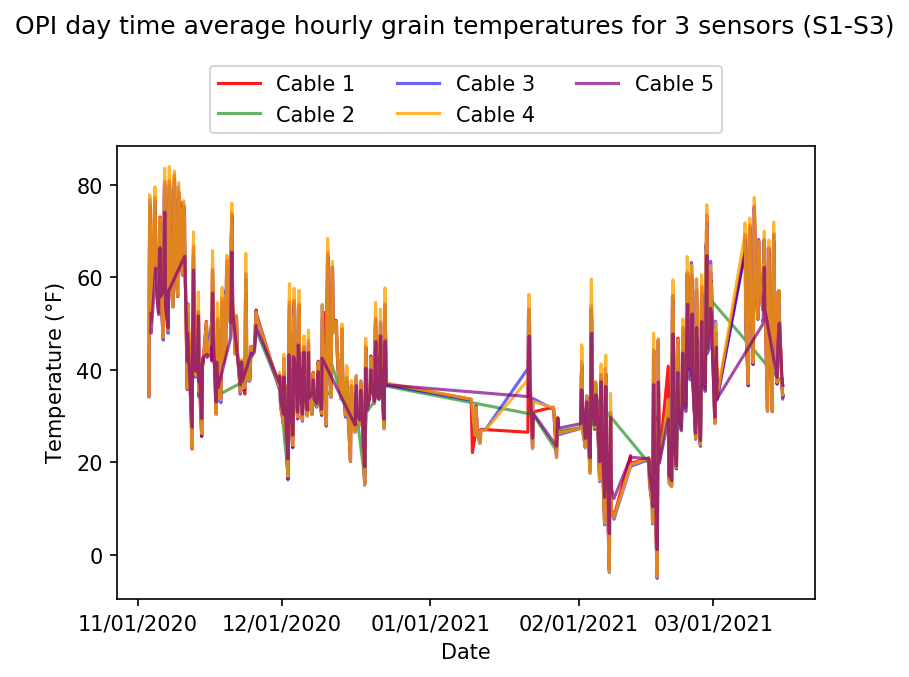

In [26]:
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(c1['OPI_DATE'].values, c1['C1s-avg'].values, color= 'red', label='Cable 1', alpha=0.9)
line2 = ax.plot(c2['OPI_DATE'].values, c2['C2s-avg'].values, color= 'green', label='Cable 2', alpha=0.6)
line3 = ax.plot(c3['OPI_DATE'].values, c3['C3s-avg'].values, color= 'blue', label='Cable 3', alpha=0.6)
line4 = ax.plot(c4['OPI_DATE'].values, c4['C4s-avg'].values, color= 'orange', label='Cable 4', alpha=0.8)
line5 = ax.plot(c5['OPI_DATE'].values, c5['C5s-avg'].values, color= 'purple', label='Cable 5', alpha=0.7)
#Date formatting 
date_form = DateFormatter("%m/%d/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($\degree$F)');
#Add lines fro line labeling
lns = line1 + line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('OPI day time average hourly grain temperatures for 3 sensors (S1-S3)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'OPI day time average hourly grain temperatures for 3 sensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [27]:
# # Moving average daytime
# temp = c1_hour_df.rolling(12).mean()
# c1_mov_avg = c1_hour_df[['OPI_DATE']].copy()
# c1_mov_avg = pd.concat([c1_mov_avg, temp], axis=1)
# c1_mov_avg = c1_mov_avg.dropna()
# c1_mov_avg

In [28]:
# # Moving average daytime c2
# temp = c2_hour_df.rolling(12).mean()
# c2_mov_avg = c2_hour_df[['OPI_DATE']].copy()
# c2_mov_avg = pd.concat([c2_mov_avg, temp], axis=1)
# c2_mov_avg = c2_mov_avg.dropna()
# c2_mov_avg

In [29]:
def get_daily_avg(original_df, time_column, value_column):
    output = []
    current_day = pd.Timestamp(original_df[time_column].values.min())
    current_day = datetime(year=current_day.year, month=current_day.month, day=current_day.day)
    end_date = pd.Timestamp(original_df[time_column].values.max())
    while current_day < end_date:
        
        day_df = original_df[(original_df[time_column] > current_day) & 
       (original_df[time_column] < current_day + timedelta(days=1))]
        output.append({
            time_column: current_day,
            value_column: day_df[value_column].mean()
        })
        current_day = current_day + timedelta(days=1)
    return pd.DataFrame(output, columns=[time_column, value_column])

In [30]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c1_daily_avg = get_daily_avg(c1, 'OPI_DATE', 'C1s-avg')
c1_daily_avg['C1-daily'] = c1_daily_avg['C1s-avg'].copy()
c1_daily_avg = c1_daily_avg.drop(['C1s-avg'], axis=1)
c1_daily_avg = c1_daily_avg.dropna()
c1_daily_avg

,OPI_DATE,C1-daily
0,2020-11-03,59.770833
1,2020-11-04,71.957143
2,2020-11-05,63.519444
3,2020-11-06,66.231250
4,2020-11-07,63.701961
...,...,...
128,2021-03-11,59.452778
129,2021-03-12,54.352778
130,2021-03-13,56.827778
131,2021-03-14,49.530556


In [31]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c2_daily_avg = get_daily_avg(c2, 'OPI_DATE', 'C2s-avg')
c2_daily_avg['C2-daily'] = c2_daily_avg['C2s-avg'].copy()
c2_daily_avg = c2_daily_avg.drop(['C2s-avg'], axis=1)
c2_daily_avg = c2_daily_avg.dropna()
c2_daily_avg

,OPI_DATE,C2-daily
0,2020-11-17,38.100000
5,2020-11-22,39.150000
6,2020-11-23,41.533333
7,2020-11-24,41.126667
8,2020-11-25,47.750000
13,2020-11-30,36.715686
15,2020-12-02,25.973333
19,2020-12-06,33.766667
20,2020-12-07,33.583333
21,2020-12-08,33.633333


In [32]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c3_daily_avg = get_daily_avg(c3, 'OPI_DATE', 'C3s-avg')
c3_daily_avg['C3-daily'] = c3_daily_avg['C3s-avg'].copy()
c3_daily_avg = c3_daily_avg.drop(['C3s-avg'], axis=1)
c3_daily_avg = c3_daily_avg.dropna()
c3_daily_avg

,OPI_DATE,C3-daily
0,2020-11-03,59.579167
1,2020-11-04,70.505556
2,2020-11-05,63.255556
3,2020-11-06,66.358333
4,2020-11-07,63.686275
...,...,...
128,2021-03-11,59.500000
129,2021-03-12,55.205556
130,2021-03-13,57.280556
131,2021-03-14,49.536111


In [33]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c4_daily_avg = get_daily_avg(c4, 'OPI_DATE', 'C4s-avg')
c4_daily_avg['C4-daily'] = c4_daily_avg['C4s-avg'].copy()
c4_daily_avg = c4_daily_avg.drop(['C4s-avg'], axis=1)
c4_daily_avg = c4_daily_avg.dropna()
c4_daily_avg

,OPI_DATE,C4-daily
0,2020-11-03,60.337500
1,2020-11-04,72.072222
2,2020-11-05,63.625000
3,2020-11-06,67.537500
4,2020-11-07,64.794118
...,...,...
128,2021-03-11,59.994444
129,2021-03-12,55.436111
130,2021-03-13,58.111111
131,2021-03-14,49.586111


In [34]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
c5_daily_avg = get_daily_avg(c5, 'OPI_DATE', 'C5s-avg')
c5_daily_avg['C5-daily'] = c5_daily_avg['C5s-avg'].copy()
c5_daily_avg = c5_daily_avg.drop(['C5s-avg'], axis=1)
c5_daily_avg = c5_daily_avg.dropna()
c5_daily_avg

,OPI_DATE,C5-daily
0,2020-11-03,49.216667
1,2020-11-04,60.083333
2,2020-11-05,59.736111
3,2020-11-06,64.536667
4,2020-11-07,50.116667
...,...,...
117,2021-02-28,49.327778
118,2021-03-01,38.647222
128,2021-03-11,54.733333
131,2021-03-14,43.038889


In [35]:
# create dataframe to save
# create new df
#Daily average from first 3 sensors
to_be_save_df = c1_daily_avg[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y'))
to_be_save_df['C1_Daily_Average'] = c1_daily_avg[['C1-daily']].copy()
to_be_save_df['C2_Daily_Average'] = c2_daily_avg[['C2-daily']].copy()
to_be_save_df['C3_Daily_Average'] = c3_daily_avg[['C3-daily']].copy()
to_be_save_df['C4_Daily_Average'] = c4_daily_avg[['C4-daily']].copy()
to_be_save_df['C5_Daily_Average'] = c5_daily_avg[['C5-daily']].copy()
to_be_save_df
# saving the daily average from first 3 sensors 
to_be_save_df.to_csv(path / 'OPI day time average daily grain temperatures for 3 sensors.csv')

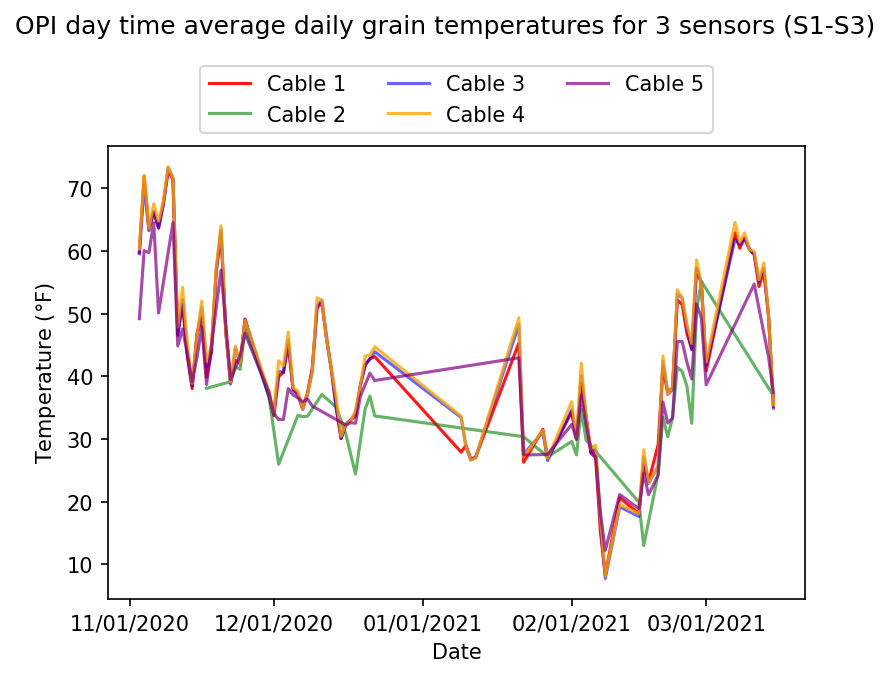

In [36]:
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(c1_daily_avg['OPI_DATE'].values, c1_daily_avg['C1-daily'].values, 'red', label='Cable 1', alpha=0.9)
line2 = ax.plot(c2_daily_avg['OPI_DATE'].values, c2_daily_avg['C2-daily'].values, 'green', label='Cable 2', alpha=0.6)
line3 =ax.plot(c3_daily_avg['OPI_DATE'].values, c3_daily_avg['C3-daily'].values,'blue', label='Cable 3', alpha=0.6)
line4 =ax.plot(c4_daily_avg['OPI_DATE'].values, c4_daily_avg['C4-daily'].values,'orange', label='Cable 4', alpha=0.8)
line5 =ax.plot(c5_daily_avg['OPI_DATE'].values, c5_daily_avg['C5-daily'].values,'purple', label='Cable 5', alpha=0.7)

#Date formatting 
date_form = DateFormatter("%m/%d/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Temperature ($\degree$F)');
#Add lines fro line labeling
lns = line1 + line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('OPI day time average daily grain temperatures for 3 sensors (S1-S3)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'OPI day time average daily grain temperatures for 3 sensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [37]:
#THIS IS FOR AVG GRAIN RH
# average of first 3 sensors
RH1 = clean_df[['OPI_DATE', 'RH1s-avg']].copy()
RH1 = RH1.dropna()
RH1

,OPI_DATE,RH1s-avg
133,2020-11-03 07:51:00,70.900000
134,2020-11-03 08:51:00,44.766667
135,2020-11-03 09:51:00,32.866667
136,2020-11-03 10:51:00,29.500000
137,2020-11-03 11:51:00,25.600000
...,...,...
2308,2021-03-15 09:21:00,71.266667
2309,2021-03-15 10:21:00,74.133333
2310,2021-03-15 11:21:00,77.666667
2311,2021-03-15 12:21:00,77.200000


In [38]:
# average of first 3 sensors
RH2 = clean_df[['OPI_DATE', 'RH2s-avg']].copy()
RH2 = RH2.dropna()
RH2

,OPI_DATE,RH2s-avg


In [39]:
# average of first 3 sensors
RH3 = clean_df[['OPI_DATE', 'RH3s-avg']].copy()
RH3 = RH3.dropna()
RH3

,OPI_DATE,RH3s-avg


In [40]:
# average of first 3 sensors
RH4 = clean_df[['OPI_DATE', 'RH4s-avg']].copy()
RH4 = RH4.dropna()
RH4

,OPI_DATE,RH4s-avg


In [41]:
# average of first 3 sensors
RH5 = clean_df[['OPI_DATE', 'RH5s-avg']].copy()
RH5 = RH5.dropna()
RH5

,OPI_DATE,RH5s-avg


In [42]:
# create dataframe to save
# create new df
to_be_save_df = RH1[['OPI_DATE']].copy()
# add new column
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
to_be_save_df['RH1_Avg_3_sensors'] = RH1[['RH1s-avg']].copy()
to_be_save_df['RH2_Avg_3_sensors'] = RH2[['RH2s-avg']].copy()
to_be_save_df['RH3_Avg_3_sensors'] = RH3[['RH3s-avg']].copy()
to_be_save_df['RH4_Avg_3_sensors'] = RH4[['RH4s-avg']].copy()
to_be_save_df['RH5_Avg_3_sensors'] = RH5[['RH5s-avg']].copy()
to_be_save_df
# saving the 3 avg sensors (hourly)
to_be_save_df.to_csv(path / 'OPI day time average hourly grain RH  for 3 sensors.csv')
to_be_save_df

,OPI_DATE,RH1_Avg_3_sensors,RH2_Avg_3_sensors,RH3_Avg_3_sensors,RH4_Avg_3_sensors,RH5_Avg_3_sensors
133,11/03/2020 07:51 AM,70.900000,NaN,NaN,NaN,NaN
134,11/03/2020 08:51 AM,44.766667,NaN,NaN,NaN,NaN
135,11/03/2020 09:51 AM,32.866667,NaN,NaN,NaN,NaN
136,11/03/2020 10:51 AM,29.500000,NaN,NaN,NaN,NaN
137,11/03/2020 11:51 AM,25.600000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2308,03/15/2021 09:21 AM,71.266667,NaN,NaN,NaN,NaN
2309,03/15/2021 10:21 AM,74.133333,NaN,NaN,NaN,NaN
2310,03/15/2021 11:21 AM,77.666667,NaN,NaN,NaN,NaN
2311,03/15/2021 12:21 PM,77.200000,NaN,NaN,NaN,NaN


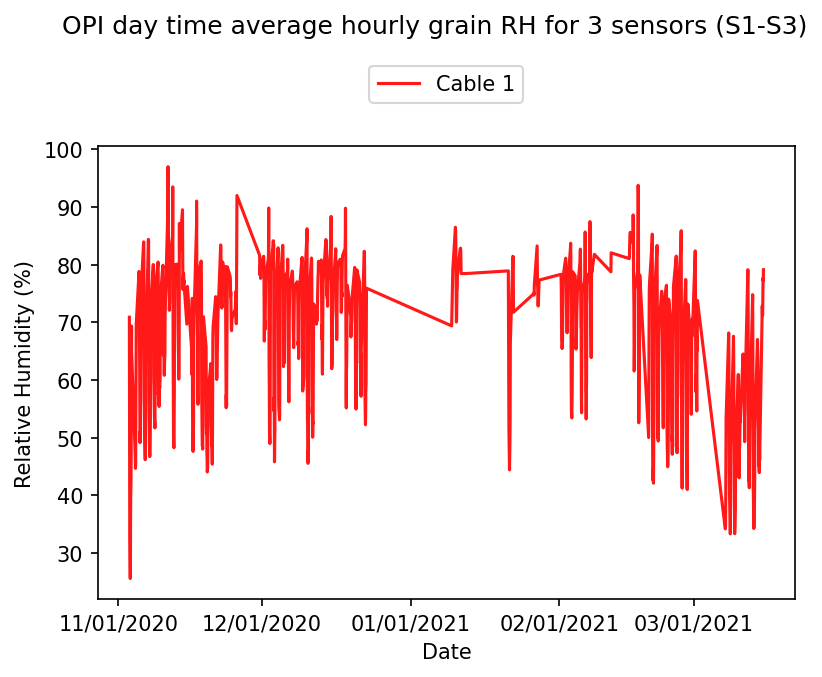

In [43]:
#Note we only have data for the center RH1 in the Bin
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(RH1['OPI_DATE'].values, RH1['RH1s-avg'].values, color= 'red', label='Cable 1', alpha=0.9)
# line2 = ax.plot(RH2['OPI_DATE'].values, RH2['RH2s-avg'].values, color= 'green', label='Cable 2', alpha=0.6)
# line3 = ax.plot(RH3['OPI_DATE'].values, RH3['RH3s-avg'].values, color= 'blue', label='Cable 3', alpha=0.6)
# line4 = ax.plot(RH4['OPI_DATE'].values, RH4['RH4s-avg'].values, color= 'orange', label='Cable 4', alpha=0.8)
# line5 = ax.plot(RH5['OPI_DATE'].values, RH5['RH5s-avg'].values, color= 'purple', label='Cable 5', alpha=0.7)
#Date formatting 
date_form = DateFormatter("%m/%d/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Relative Humidity (%)');
#Add lines fro line labeling
lns = line1 
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('OPI day time average hourly grain RH for 3 sensors (S1-S3)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'OPI day time average hourly grain RH for 3 sensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [44]:
#This is for avg daily RH 
#note that it is only one cable that works i.e RH1 hence other cables are 'commented'
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
RH1_daily_avg = get_daily_avg(RH1, 'OPI_DATE', 'RH1s-avg')
RH1_daily_avg['RH1-daily'] = RH1_daily_avg['RH1s-avg'].copy()
RH1_daily_avg = RH1_daily_avg.drop(['RH1s-avg'], axis=1)
RH1_daily_avg = RH1_daily_avg.dropna()
RH1_daily_avg

,OPI_DATE,RH1-daily
0,2020-11-03,49.375000
1,2020-11-04,52.171429
2,2020-11-05,62.672222
3,2020-11-06,61.612500
4,2020-11-07,66.478431
...,...,...
128,2021-03-11,58.166667
129,2021-03-12,53.933333
130,2021-03-13,45.711111
131,2021-03-14,53.013889


In [45]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
RH2
# RH2_daily_avg = get_daily_avg(RH2, 'OPI_DATE', 'RH2s-avg')
# RH2_daily_avg['RH2-daily'] = RH2_daily_avg['RH2s-avg'].copy()
# RH2_daily_avg = RH2_daily_avg.drop(['RH2s-avg'], axis=1)
# RH2_daily_avg = RH2_daily_avg.dropna()
# RH2_daily_avg

,OPI_DATE,RH2s-avg


In [46]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
RH3
# RH3_daily_avg = get_daily_avg(RH3, 'OPI_DATE', 'RH3s-avg')
# RH3_daily_avg['RH3-daily'] = RH3_daily_avg['RH3s-avg'].copy()
# RH3_daily_avg = RH3_daily_avg.drop(['RH3s-avg'], axis=1)
# RH3_daily_avg = RH3_daily_avg.dropna()
# RH3_daily_avg

,OPI_DATE,RH3s-avg


In [47]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
# RH4_daily_avg = get_daily_avg(RH2, 'OPI_DATE', 'RH4s-avg')
# RH4_daily_avg['RH4-daily'] = RH4_daily_avg['RH4s-avg'].copy()
# RH4_daily_avg = RH4_daily_avg.drop(['RH4s-avg'], axis=1)
# RH4_daily_avg = RH4_daily_avg.dropna()
# RH4_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [48]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
# RH5_daily_avg = get_daily_avg(RH5, 'OPI_DATE', 'RH5s-avg')
# RH5_daily_avg['RH5-daily'] = RH5_daily_avg['RH5s-avg'].copy()
# RH5_daily_avg = RH5_daily_avg.drop(['RH5s-avg'], axis=1)
# RH5_daily_avg = RH5_daily_avg.dropna()
# RH5_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [49]:
# create dataframe to save
# create new df
#Daily average from first 3 sensors
to_be_save_df = RH1_daily_avg[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y'))
to_be_save_df['RH1_Daily_Average'] = RH1_daily_avg[['RH1-daily']].copy()
# to_be_save_df['RH2_Daily_Average'] = RH2_daily_avg[['RH2-daily']].copy()
# to_be_save_df['RH3_Daily_Average'] = RH3_daily_avg[['RH3-daily']].copy()
# to_be_save_df['RH4_Daily_Average'] = RH4_daily_avg[['RH4-daily']].copy()
# to_be_save_df['RH5_Daily_Average'] = RH5_daily_avg[['RH5-daily']].copy()
to_be_save_df
# saving the daily average from first 3 sensors 
to_be_save_df.to_csv(path / 'OPI daily time daily average grain RH.csv')

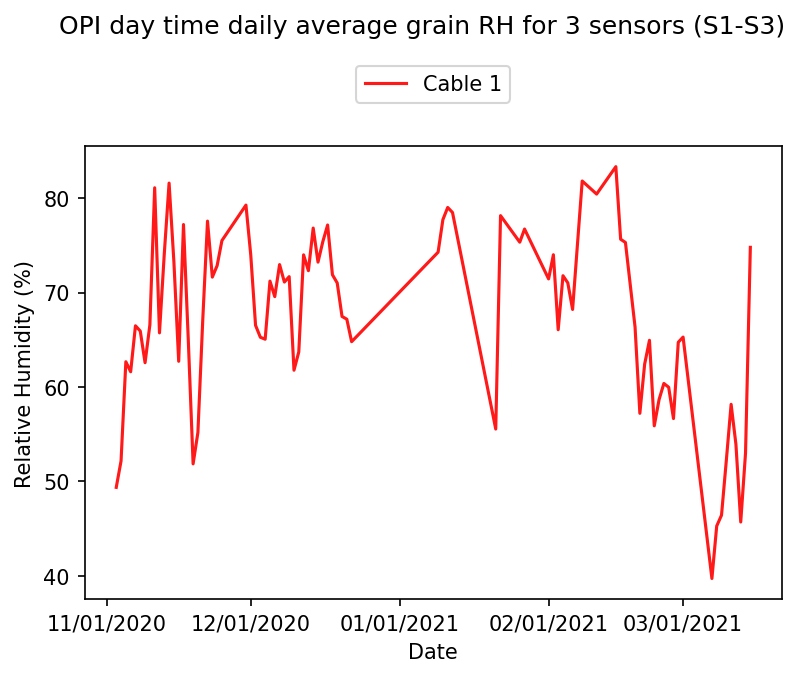

In [50]:
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(RH1_daily_avg['OPI_DATE'].values, RH1_daily_avg['RH1-daily'].values, 'red', label='Cable 1', alpha=0.9)
# line2 = ax.plot(RH2_daily_avg['OPI_DATE'].values, RH2_daily_avg['RH2-daily'].values, 'green', label='Cable 2', alpha=0.6)
# line3 =ax.plot(RH3_daily_avg['OPI_DATE'].values, RH3_daily_avg['RH3-daily'].values,'blue', label='Cable 3', alpha=0.6)
# line4 =ax.plot(RH4_daily_avg['OPI_DATE'].values, RH4_daily_avg['RH4-daily'].values,'orange', label='Cable 4', alpha=0.8)
# line5 =ax.plot(RH5_daily_avg['OPI_DATE'].values, RH5_daily_avg['RH5-daily'].values,'purple', label='Cable 5', alpha=0.7)
#Date formatting 
date_form = DateFormatter("%m/%d/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Relative Humidity (%)');
#Add lines fro line labeling
lns = line1 #+ line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('OPI day time daily average grain RH for 3 sensors (S1-S3)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'OPI day time daily average grain RH for 3 sensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [51]:
#THIS IS FOR AVG GRAIN MC
# average of first 3 sensors
#NOTE only cable 1 is working (MC1) hence we 'comment' on the others
MC1 = clean_df[['OPI_DATE', 'MC1s-avg']].copy()
MC1 = MC1.dropna()
MC1

,OPI_DATE,MC1s-avg
143,2020-11-03 17:51:00,13.080000
144,2020-11-03 18:23:00,14.200000
145,2020-11-03 18:40:00,14.540000
146,2020-11-03 18:41:00,14.540000
147,2020-11-03 18:47:00,14.006667
...,...,...
2308,2021-03-15 09:21:00,15.160000
2309,2021-03-15 10:21:00,15.603333
2310,2021-03-15 11:21:00,16.190000
2311,2021-03-15 12:21:00,16.103333


In [52]:
# average of first 3 sensors
# MC2 = clean_df[['OPI_DATE', 'MC2s-avg']].copy()
# MC2 = MC2.dropna()
# MC2

In [53]:
# average of first 3 sensors
# MC3 = clean_df[['OPI_DATE', 'MC3s-avg']].copy()
# MC3 = MC3.dropna()
# MC3

In [54]:
# average of first 3 sensors
# MC4 = clean_df[['OPI_DATE', 'MC4s-avg']].copy()
# MC4 = MC4.dropna()
# MC4

In [55]:
# average of first 3 sensors
# MC5 = clean_df[['OPI_DATE', 'MC5s-avg']].copy()
# MC5 = MC5.dropna()
# MC5

In [56]:
# create dataframe to save
# create new df
to_be_save_df = MC1[['OPI_DATE']].copy()
# add new column
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y %I:%M %p'))
to_be_save_df['MC1_Avg_3_sensors'] = MC1[['MC1s-avg']].copy()
# to_be_save_df['MC2_Avg_3_sensors'] = RH2[['MC2s-avg']].copy()
# to_be_save_df['MC3_Avg_3_sensors'] = RH3[['MC3s-avg']].copy()
# to_be_save_df['MC4_Avg_3_sensors'] = RH4[['MC4s-avg']].copy()
# to_be_save_df['MC5_Avg_3_sensors'] = RH5[['MC5s-avg']].copy()
to_be_save_df
# saving the 3 avg sensors (hourly)
to_be_save_df.to_csv(path / 'OPI day time average hourly grain MC  for 3 sensors.csv')
to_be_save_df

,OPI_DATE,MC1_Avg_3_sensors
143,11/03/2020 05:51 PM,13.080000
144,11/03/2020 06:23 PM,14.200000
145,11/03/2020 06:40 PM,14.540000
146,11/03/2020 06:41 PM,14.540000
147,11/03/2020 06:47 PM,14.006667
...,...,...
2308,03/15/2021 09:21 AM,15.160000
2309,03/15/2021 10:21 AM,15.603333
2310,03/15/2021 11:21 AM,16.190000
2311,03/15/2021 12:21 PM,16.103333


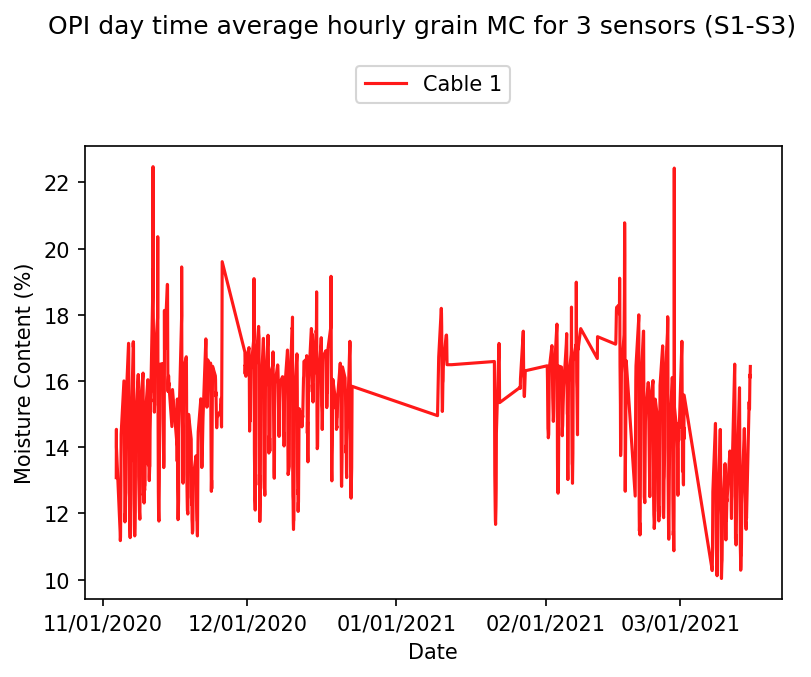

In [57]:
#Note we only have data for the center RH1 in the Bin
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(MC1['OPI_DATE'].values, MC1['MC1s-avg'].values, color= 'red', label='Cable 1', alpha=0.9)
# line2 = ax.plot(MC2['OPI_DATE'].values, MC2['MC2s-avg'].values, color= 'green', label='Cable 2', alpha=0.6)
# line3 = ax.plot(MC3['OPI_DATE'].values, MC3['MC3s-avg'].values, color= 'blue', label='Cable 3', alpha=0.6)
# line4 = ax.plot(MC4['OPI_DATE'].values, MC4['MC4s-avg'].values, color= 'orange', label='Cable 4', alpha=0.8)
# line5 = ax.plot(MC5['OPI_DATE'].values, MC5['MC5s-avg'].values, color= 'purple', label='Cable 5', alpha=0.7)
#Date formatting 
date_form = DateFormatter("%m/%d/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Moisture Content (%)');
#Add lines fro line labeling
lns = line1 
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('OPI day time average hourly grain MC for 3 sensors (S1-S3)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'OPI day time average hourly grain MC for 3 sensors.jpeg'
plt.savefig(filename, bbox_inches='tight')

In [58]:
#for daytime avg grain MC
#note only cable 1 works (MC1) hence we "comment" on others
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
MC1_daily_avg = get_daily_avg(MC1, 'OPI_DATE', 'MC1s-avg')
MC1_daily_avg['MC1-daily'] = MC1_daily_avg['MC1s-avg'].copy()
MC1_daily_avg = MC1_daily_avg.drop(['MC1s-avg'], axis=1)
MC1_daily_avg = MC1_daily_avg.dropna()
MC1_daily_avg

,OPI_DATE,MC1-daily
0,2020-11-03,14.062222
1,2020-11-04,12.115714
2,2020-11-05,13.564722
3,2020-11-06,13.413542
4,2020-11-07,14.278627
...,...,...
128,2021-03-11,13.009722
129,2021-03-12,12.738056
130,2021-03-13,11.768889
131,2021-03-14,12.674722


In [59]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
# MC2_daily_avg = get_daily_avg(MC2, 'OPI_DATE', 'MC2s-avg')
# MC2_daily_avg['MC2-daily'] = MC2_daily_avg['MC2s-avg'].copy()
# MC2_daily_avg = MC2_daily_avg.drop(['MC2s-avg'], axis=1)
# MC2_daily_avg = MC2_daily_avg.dropna()
# MC2_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [60]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
# MC3_daily_avg = get_daily_avg(MC3, 'OPI_DATE', 'MC3s-avg')
# MC3_daily_avg['MC3-daily'] = MC3_daily_avg['MC3s-avg'].copy()
# MC3_daily_avg = MC3_daily_avg.drop(['MC3s-avg'], axis=1)
# MC3_daily_avg = MC3_daily_avg.dropna()
# MC3_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [61]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
# MC4_daily_avg = get_daily_avg(MC4, 'OPI_DATE', 'MC4s-avg')
# MC4_daily_avg['MC4-daily'] = MC4_daily_avg['MC4s-avg'].copy()
# MC4_daily_avg = MC4_daily_avg.drop(['MC4s-avg'], axis=1)
# MC4_daily_avg = MC4_daily_avg.dropna()
# MC4_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [62]:
'''
This function will take a dataframe and find daily average
There are 3 inputs
dataframe
timestamp column's name
value column's name
'''
# MC5_daily_avg = get_daily_avg(MC5, 'OPI_DATE', 'MC5s-avg')
# MC5_daily_avg['MC5-daily'] = MC5_daily_avg['MC5s-avg'].copy()
# MC5_daily_avg = MC5_daily_avg.drop(['MC5s-avg'], axis=1)
# MC5_daily_avg = MC5_daily_avg.dropna()
# MC5_daily_avg

"\nThis function will take a dataframe and find daily average\nThere are 3 inputs\ndataframe\ntimestamp column's name\nvalue column's name\n"

In [63]:
# create dataframe to save
# create new df
#Daily average from first 3 sensors
to_be_save_df = MC1_daily_avg[['OPI_DATE']].copy()
# add new coloum
to_be_save_df['OPI_DATE'] = to_be_save_df['OPI_DATE'].apply(lambda x: datetime.strftime(x, '%m/%d/%Y'))
to_be_save_df['MC1_Daily_Average'] = MC1_daily_avg[['MC1-daily']].copy()
# to_be_save_df['MC2_Daily_Average'] = MC2_daily_avg[['MC2-daily']].copy()
# to_be_save_df['MC3_Daily_Average'] = MC3_daily_avg[['MC3-daily']].copy()
# to_be_save_df['MC4_Daily_Average'] = MC4_daily_avg[['MC4-daily']].copy()
# to_be_save_df['MC5_Daily_Average'] = MC5_daily_avg[['MC5-daily']].copy()
to_be_save_df
# saving the daily average from first 3 sensors 
to_be_save_df.to_csv(path / 'OPI daily time daily average grain MC.csv')

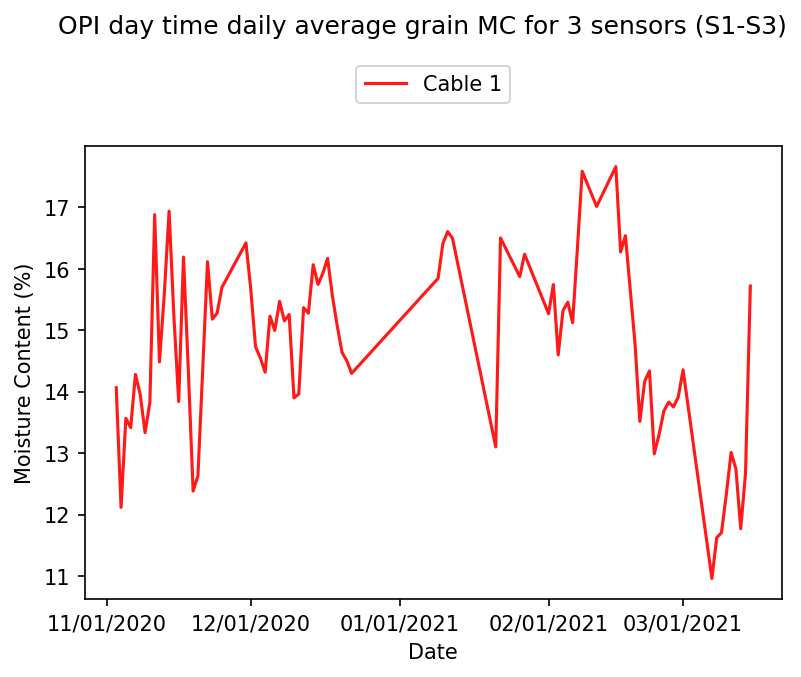

In [64]:
fig, ax = plt.subplots(dpi=150)
line1 = ax.plot(MC1_daily_avg['OPI_DATE'].values, MC1_daily_avg['MC1-daily'].values, 'red', label='Cable 1', alpha=0.9)
# line2 = ax.plot(MC2_daily_avg['OPI_DATE'].values, MC2_daily_avg['MC2-daily'].values, 'green', label='Cable 2', alpha=0.6)
# line3 =ax.plot(MC3_daily_avg['OPI_DATE'].values, MC3_daily_avg['MC3-daily'].values,'blue', label='Cable 3', alpha=0.6)
# line4 =ax.plot(MC4_daily_avg['OPI_DATE'].values, MC4_daily_avg['MC4-daily'].values,'orange', label='Cable 4', alpha=0.8)
# line5 =ax.plot(MC5_daily_avg['OPI_DATE'].values, MC5_daily_avg['MC5-daily'].values,'purple', label='Cable 5', alpha=0.7)
#Date formatting 
date_form = DateFormatter("%m/%d/%Y")
#Specify axis to be date formatted
ax.xaxis.set_major_formatter(date_form)
months = MonthLocator()
ax.xaxis.set_major_locator(months)
#label x and y axis
ax.set_xlabel('Date')
ax.set_ylabel('Moisture Content (%)');
#Add lines fro line labeling
lns = line1 #+ line2 + line3 + line4 + line5
labs = [l.get_label() for l in lns]
#Title box 
fig.suptitle('OPI day time daily average grain MC for 3 sensors (S1-S3)', y=1.1)
#Legend
ax.legend(lns, labs, bbox_to_anchor=(0.5, 1.2), loc="upper center", ncol=3);
filename = path / 'OPI day time daily average grain MC for 3 sensors.jpeg'
plt.savefig(filename, bbox_inches='tight')